In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PRIMEROS Y ULTIMOS DATOS

Visualizamos los primeros registros del dataset

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(4)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793


In [ ]:
df.tail(4)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080
299999,299999,Under Armour,Canvas,Small,2.0,No,Yes,Backpack,Black,18.568865,26.72762


# ESTRUCTURA DEL DATASET

Vemos la forma en la que esta estructurado el dataset. Vemos cuantas columnas y filas tiene, los nombres de columna, los valores unicos de cada columnas y su cantidad.

In [ ]:
#Muestra numero de filas y columnas
df.shape

(300000, 11)

In [ ]:
#Muestra los features del dataset
df.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [ ]:
#Muestra la cantidad de valores unicos por features
df.nunique()

,0
id,300000
Brand,5
Material,4
Size,3
Compartments,10
Laptop Compartment,2
Waterproof,2
Style,3
Color,6
Weight Capacity (kg),181596


In [ ]:
#Muestra tipo de dato de cada columna
df.dtypes

,0
id,int64
Brand,object
Material,object
Size,object
Compartments,float64
Laptop Compartment,object
Waterproof,object
Style,object
Color,object
Weight Capacity (kg),float64


In [ ]:
#Muestra el nombre de losvaloresunicosde cada columna categorica
for col in df.columns:
  if df[col].dtype == 'object':
    print( f' {col} : {df[col].unique()} ')

 Brand : ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma' nan] 
 Material : ['Leather' 'Canvas' 'Nylon' nan 'Polyester'] 
 Size : ['Medium' 'Small' 'Large' nan] 
 Laptop Compartment : ['Yes' 'No' nan] 
 Waterproof : ['No' 'Yes' nan] 
 Style : ['Tote' 'Messenger' nan 'Backpack'] 
 Color : ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink' nan] 


# DESCRIPCION ESTADISTICA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [ ]:
# Muestra un resumen estadistico del dataset
df.describe( include=['O'] ).T

,count,unique,top,freq
Brand,290295,5,Adidas,60077
Material,291653,4,Polyester,79630
Size,293405,3,Medium,101906
Laptop Compartment,292556,2,Yes,148342
Waterproof,292950,2,Yes,148077
Style,292030,3,Messenger,100031
Color,290050,6,Pink,51690


# VALORES NULOS Y DUPLICADOS

Verificamos si cuenta con valores duplicados y valores nulos.

In [ ]:
# Muestra si hay valores duplicados
df.duplicated().sum()

0

In [ ]:
# Muestra la cantidad de nulos por columna
df.isnull().mean() * 100

,0
id,0.000000
Brand,3.235000
Material,2.782333
Size,2.198333
Compartments,0.000000
Laptop Compartment,2.481333
Waterproof,2.350000
Style,2.656667
Color,3.316667
Weight Capacity (kg),0.046000


Observamos que en la mayoría de columnas tiene valores nulos.

## IMPUTACIÓNDE DATOS NULOS

Imputaremos los datos. Para los datos categoricos usaremos la moda mientras pra los datos numericos la mediana.

In [ ]:
lista_null = ['Brand', 'Material', 'Size', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)']

In [ ]:
for col in lista_null:
  if df[col].dtype == 'object':
    df[col].fillna(df[col].mode()[0], inplace=True)

  else:
    df[col].fillna( df[col].median(), inplace=True )

<ipython-input-71-0b9426d60d55>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-71-0b9426d60d55>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

# ENCODING

Codificaremos las columnas categoricas. Para "Waterproof", "Laptop Compartment" y "Size" usaremos Ordinal Encoding. Para "Brand", "Material", "Style" y "Color"usaremos One-Hot-Encoding.

In [ ]:
#Hacemos una copia para el modelo de catboosting regressor
df_cat = df.copy()

In [ ]:
df['Waterproof'] = df['Waterproof'].map({'No':0, 'Yes':1})
df['Laptop Compartment'] = df['Laptop Compartment'].map({'No':0, 'Yes':1})
df["Size"] = df["Size"].map({"Small": 1, "Medium": 2, "Large": 3})

In [ ]:
columnas = ["Brand", "Material", "Style", "Color"]
df = pd.get_dummies(df, columns=columnas, drop_first=True)

## NORMALIZACIÓN DE DATOS

Para los datos numericos podriamos normalizarlo. Verificamos que tipo de distribución tiene y usaremos el más conveniente pero debido a que usaremos arboles de desicion no es necesario.

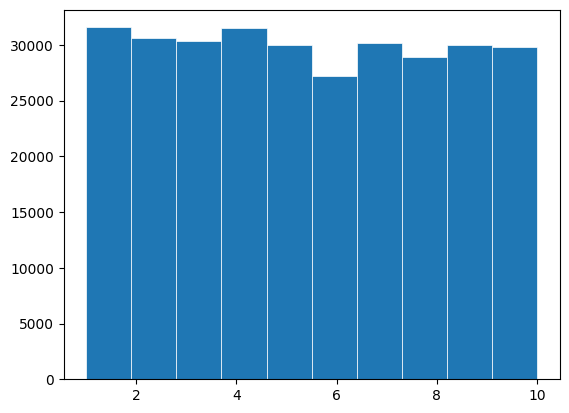

In [ ]:
plt.hist(df['Compartments'], bins = 10,linewidth=0.5,  edgecolor="white")
plt.show()

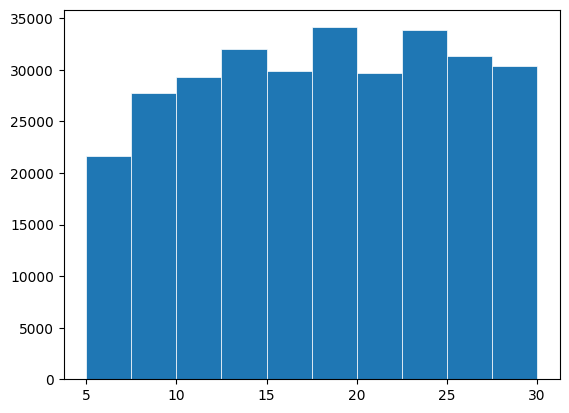

In [ ]:
plt.hist(df['Weight Capacity (kg)'], bins = 10,linewidth=0.5,  edgecolor="white")
plt.show()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#df[["Laptop Compartment", "Weight Capacity (kg)"]] = scaler.fit_transform(df[["Laptop Compartment", "Weight Capacity (kg)"]])

# COMPROBAR DATASET LIMPIO

COMPROBAMOS QUE NO HAY DATOS DUPLICADOS, VALORES NULOS Y QUE CADA DATOS ESTE CODIFICADO

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().mean() * 100

,0
id,0.0
Size,0.0
Compartments,0.0
Laptop Compartment,0.0
Waterproof,0.0
Weight Capacity (kg),0.0
Price,0.0
Brand_Jansport,0.0
Brand_Nike,0.0
Brand_Puma,0.0


# ENTRENANDO MODELO

Probaremos 3 modelos algorimos: Arbol de Decisión, Gradient Boosting y CatBoostRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  #
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score

## DIVISION DE DATOS

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ARBOL DE DECISION(REGRESION)

In [ ]:
reg = DecisionTreeRegressor(
    criterion="squared_error",
    max_depth=5,
    random_state=42
    )
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
mse_arbol = mean_squared_error(y_test, y_pred)
r2_arbol = r2_score(y_test, y_pred)
mae_arbol = mean_absolute_error(y_test, y_pred)
rmse_arbol = np.sqrt(mse_arbol)

In [ ]:
print("Error Cuadrático Medio (MSE):", mse_arbol)
print("Coeficiente de Determinación (R²):", r2_arbol)
print("Error Cuadrático Medio (RMSE):", rmse_arbol)
print("Error Absoluto Medio (MAE):", mae_arbol)

Error Cuadrático Medio (MSE): 1516.1146281058088
Coeficiente de Determinación (R²): 0.00033055300641404717
Error Cuadrático Medio (RMSE): 38.937316652612424
Error Absoluto Medio (MAE): 33.66036450195353


## Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Modelo de Gradient Boosting
gbr = GradientBoostingRegressor(
    n_estimators=100,  # Número de árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=3,       # Profundidad máxima de cada árbol
    random_state=42
)

In [ ]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = gbr.predict(X_test)

In [ ]:
mse_gra = mean_squared_error(y_test, y_pred)
r2_gra = r2_score(y_test, y_pred)
mae_gra = mean_absolute_error(y_test, y_pred)
rmse_gra = np.sqrt(mse_gra)

In [ ]:
print("Error Cuadrático Medio (MSE):", mse_gra)
print("Coeficiente de Determinación (R²):", r2_gra)
print("Error Cuadrático Medio (RMSE):", rmse_gra)
print("Error Absoluto Medio (MAE):", mae_gra)

Error Cuadrático Medio (MSE): 1514.8216588632972
Coeficiente de Determinación (R²): 0.0011830887076599295
Error Cuadrático Medio (RMSE): 38.920709896702775
Error Absoluto Medio (MAE): 33.64696054085034


##CatBoostRegressor

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [ ]:
X = df_cat.drop(columns=['Price'])
y = df_cat['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cat_features = list(X.select_dtypes(include=['object']).columns)

In [ ]:
# Modelo de CatBoost
catboost = CatBoostRegressor(
    iterations=100,       # Número de árboles
    learning_rate=0.1,    # Tasa de aprendizaje
    depth=6,              # Profundidad máxima de cada árbol
    cat_features=cat_features,  # Columnas categóricas
    random_seed=42,
    verbose=0             # Silencia el entrenamiento
)

In [ ]:
catboost.fit(X_train, y_train)

In [ ]:
y_pred = catboost.predict(X_test)

In [ ]:
mse_cat = mean_squared_error(y_test, y_pred)
r2_cat = r2_score(y_test, y_pred)
mae_cat = mean_absolute_error(y_test, y_pred)
rmse_cat = np.sqrt(mse_cat)

In [ ]:
print("Error Cuadrático Medio (MSE):", mse_cat)
print("Coeficiente de Determinación (R²):", r2_cat)
print("Error Cuadrático Medio (RMSE):", rmse_cat)
print("Error Absoluto Medio (MAE):", mae_cat)

Error Cuadrático Medio (MSE): 1515.050789572663
Coeficiente de Determinación (R²): 0.0010320084626210813
Error Cuadrático Medio (RMSE): 38.92365334308514
Error Absoluto Medio (MAE): 33.655388770937805


## COMPARACION DE MODELOS

In [ ]:
df_comp = pd.DataFrame({
    'Modelo': ['Arbol de Decisión', 'Gradient Boosting', 'CatBoostRegressor'],
    'MSE': [mse_arbol, mse_gra, mse_cat],
    'R2': [r2_arbol, r2_gra, r2_cat ],
    'RMSE': [rmse_arbol, rmse_gra, rmse_cat],
    'MAE': [mae_arbol, mae_gra, mae_cat]
})

In [ ]:
df_comp

,Modelo,MSE,R2,RMSE,MAE
0,Arbol de Decisión,1516.114628,0.000331,38.937317,33.660365
1,Gradient Boosting,1514.821659,0.001183,38.920710,33.646961
2,CatBoostRegressor,1515.050790,0.001032,38.923653,33.655389
